<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Principal%20Component%20Analysis(Wine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
path = r"/content/wine.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
print(df.head())
print(df.describe())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.0

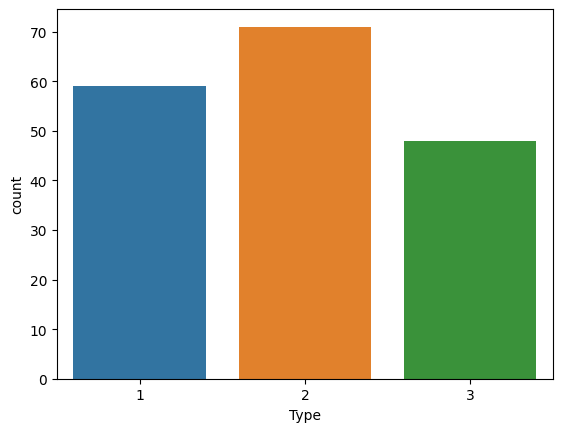

In [6]:
sns.countplot(x="Type", data=df)
plt.show()


In [7]:
df = df.drop("Type", axis=1)

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
pca = PCA(n_components=3)
pca_scores = pca.fit_transform(scaled_data)

In [10]:
linkage = "ward"
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage=linkage)
hierarchical_labels = hierarchical_cluster.fit_predict(pca_scores)

In [15]:
k_values = range(2, 10)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_scores)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_scores, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

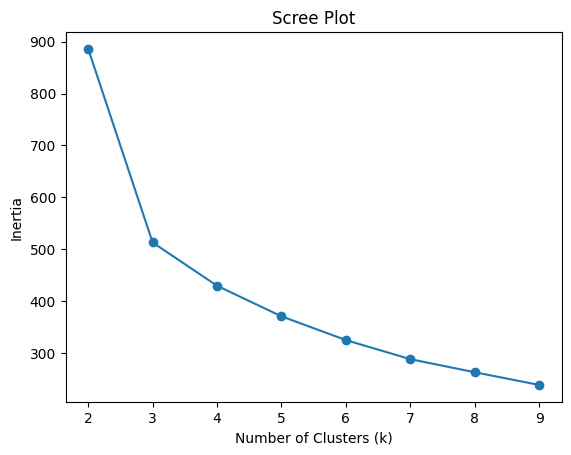

In [16]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Scree Plot")
plt.show()

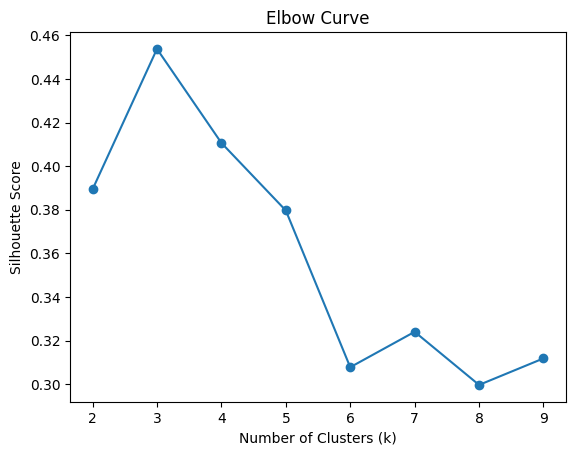

In [17]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve")
plt.show()

In [19]:
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print("Optimum number of clusters based on Silhouette Score:", optimal_k_silhouette)

Optimum number of clusters based on Silhouette Score: 3


In [20]:
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
kmeans.fit(pca_scores)
labels = kmeans.labels_
print("K-means Clustering - Silhouette Score:", silhouette_score(pca_scores, labels))

K-means Clustering - Silhouette Score: 0.45379998482576156


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
print("Hierarchical Clustering - Silhouette Score:", silhouette_score(pca_scores, hierarchical_labels))
print("K-means Clustering - Silhouette Score:", silhouette_scores[optimal_k_silhouette - 2])

Hierarchical Clustering - Silhouette Score: 0.44594921980629704
K-means Clustering - Silhouette Score: 0.45379998482576156


In [22]:
df_pca = pd.DataFrame(data=pca_scores, columns=["PC1", "PC2", "PC3"])
df_pca["Cluster"] = hierarchical_labels

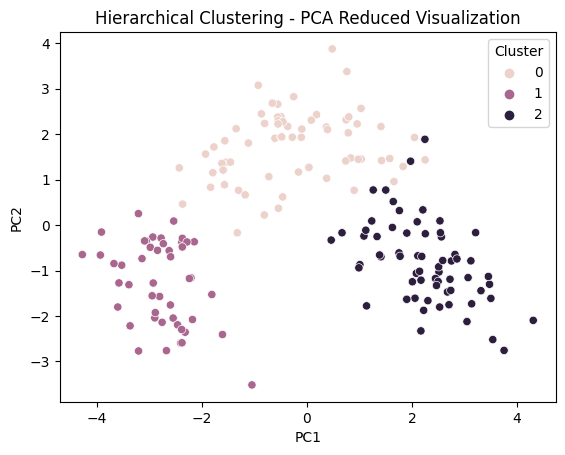

In [23]:
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clustering - PCA Reduced Visualization")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
kmeans.fit(pca_scores)
df_pca["Cluster"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


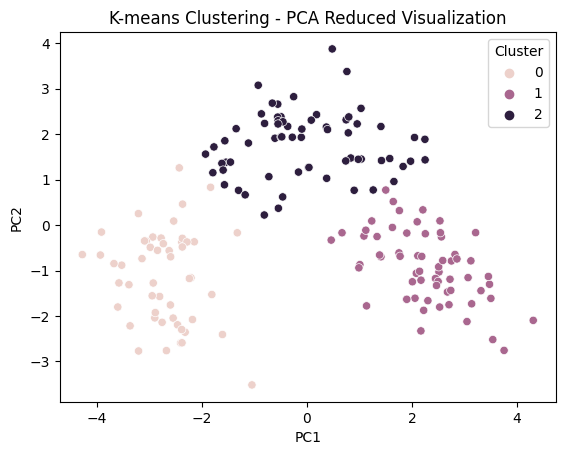

In [25]:
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means Clustering - PCA Reduced Visualization")
plt.show()